In [1]:
#  Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [7]:
# Load dataset
df = pd.read_csv('customers.csv')
print(df)

    CustomerID  AnnualIncome  SpendingScore
0            1            15             39
1            2            16             81
2            3            17              6
3            4            18             77
4            5            19             40
5            6            20             76
6            7            21              6
7            8            22             94
8            9            23              3
9           10            24             72
10          11            25             14
11          12            26             99
12          13            27             15
13          14            28             77
14          15            29             13
15          16            30             79
16          17            31             35
17          18            32             66
18          19            33             29
19          20            34             98


In [9]:
# Select features for clustering
X = df[['AnnualIncome', 'SpendingScore']]

In [11]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\sonap\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sonap\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sonap\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sonap\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

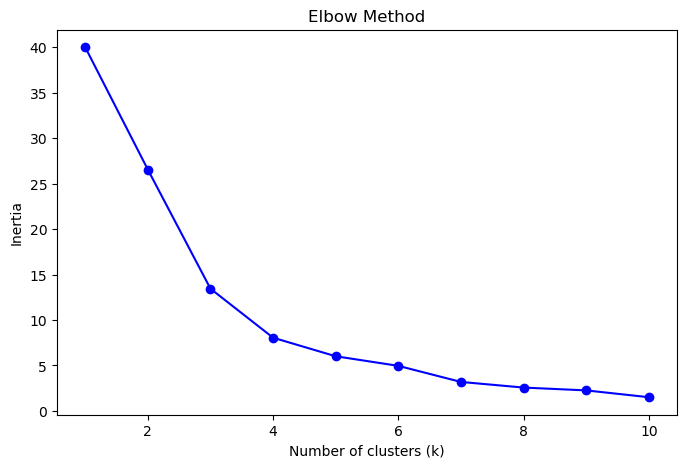

In [17]:
#  Find optimal k using Elbow Method
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [19]:
# Apply KMeans with k = 3 (you can pick based on elbow plot)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add cluster labels to DataFrame
df['Cluster'] = y_kmeans

print(df)

    CustomerID  AnnualIncome  SpendingScore  Cluster
0            1            15             39        2
1            2            16             81        0
2            3            17              6        2
3            4            18             77        0
4            5            19             40        2
5            6            20             76        0
6            7            21              6        2
7            8            22             94        0
8            9            23              3        2
9           10            24             72        0
10          11            25             14        2
11          12            26             99        0
12          13            27             15        2
13          14            28             77        1
14          15            29             13        1
15          16            30             79        1
16          17            31             35        1
17          18            32             66   

C:\Users\sonap\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


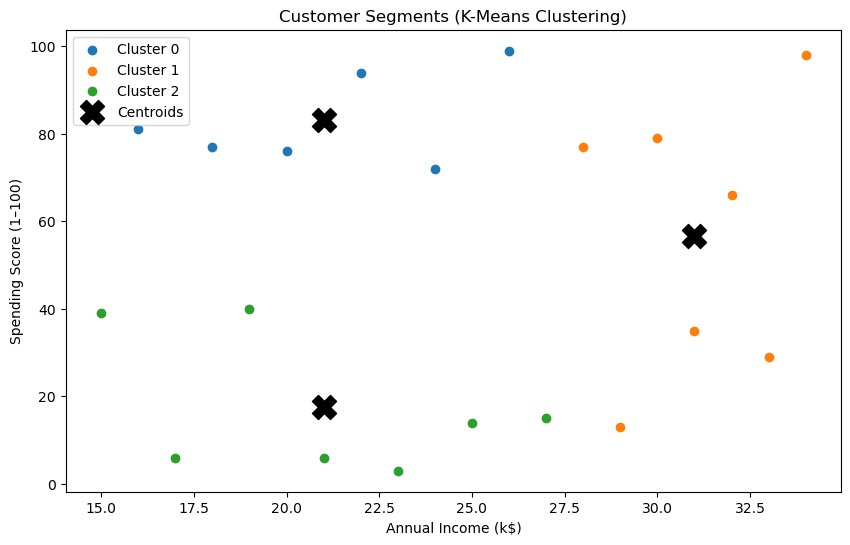

In [21]:
# Visualize clusters
plt.figure(figsize=(10, 6))
for cluster in range(k):
    plt.scatter(
        df[df['Cluster'] == cluster]['AnnualIncome'],
        df[df['Cluster'] == cluster]['SpendingScore'],
        label=f'Cluster {cluster}'
    )

# Plot centroids (inverse transform to get original scale)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    s=300, c='black', marker='X', label='Centroids'
)

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1–100)')
plt.title('Customer Segments (K-Means Clustering)')
plt.legend()
plt.show()